In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
pip install numpy==1.22.0


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
c = df.corr()






In [8]:
c

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

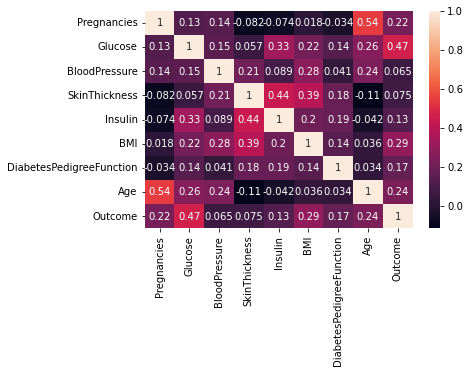

In [10]:
sns.heatmap(c,annot = True)

In [27]:
x = df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

accuracys = []
recalls = []
precisions = []
f1_scores = []
errors = []
cf_matrix = []
fpers = []
tpers = []


In [32]:

def process(clf, x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    error_rate = 1 - accuracy
    precision = confusion[0][0] / (confusion[0][0] + confusion[1][0]) * 100
    recall = confusion[0][0] / (confusion[0][0] + confusion[0][1]) * 100
    f1_score = ((2 * precision * recall) / (precision + recall)) / 100
    
    probs = clf.predict_proba(x_test)[:,1]
    fper,tper,_ = roc_curve(y_test,probs)
   
    fpers.append(fper)
    tpers.append(tper)
    accuracys.append(accuracy)
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1_score)
    errors.append(error_rate)
    cf_matrix.append(confusion)
    cf_matrix.append(confusion)
   

    

In [33]:
algo = [
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    GaussianNB(),  # Updated to GaussianNB
    SVC(gamma=0.01, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),  # Added Logistic Regression
    XGBClassifier()  # Added XGBoost
]

# Names of algorithms
algos = [
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "SVM",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "Logistic Regression",  # Added Logistic Regression
    "XGBoost"  # Added XGBoost
]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


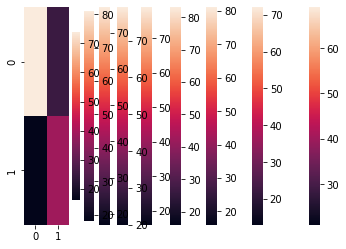

In [34]:
for clf in algo:
    process(clf)


In [31]:
Metric = pd.DataFrame({
    'Algorithm': algos,
    "Error rate": errors,
    'Accuracy': accuracys,
    'Recall': recalls,
    'Precision': precisions,
    'F1_score': f1_scores
})
Metric


,Algorithm,Error rate,Accuracy,Recall,Precision,F1_score
0,KNN,0.331169,0.668831,69.696970,76.666667,0.730159
1,Decision Tree,0.272727,0.727273,70.707071,84.337349,0.769231
2,Naive Bayes,0.220779,0.779221,81.818182,83.505155,0.826531
3,SVM,0.318182,0.681818,83.838384,71.551724,0.772093
4,Random Forest,0.240260,0.759740,80.808081,81.632653,0.812183
5,AdaBoost,0.272727,0.727273,79.797980,78.217822,0.790000
6,Gradient Boosting,0.253247,0.746753,77.777778,81.914894,0.797927
7,Logistic Regression,0.240260,0.759740,81.818182,81.000000,0.814070
8,XGBoost,0.266234,0.733766,74.747475,82.222222,0.783069


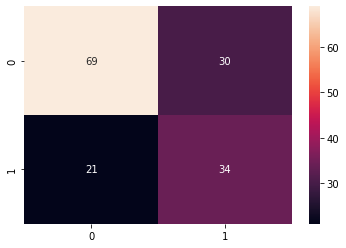

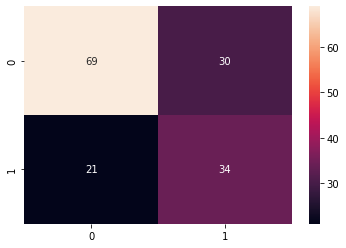

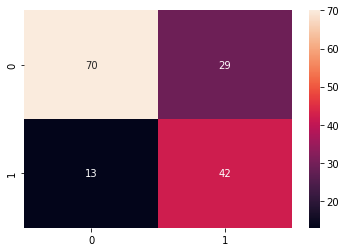

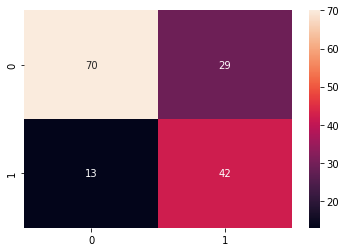

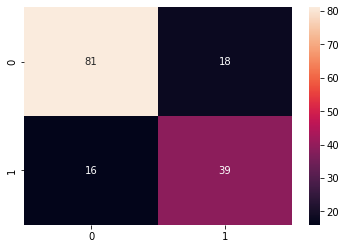

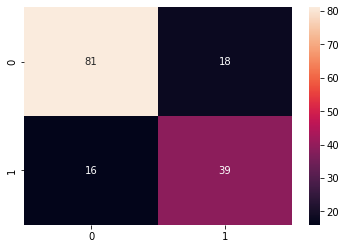

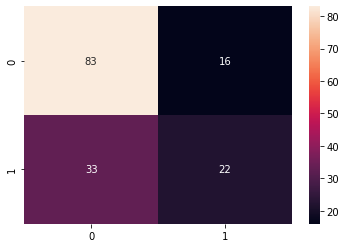

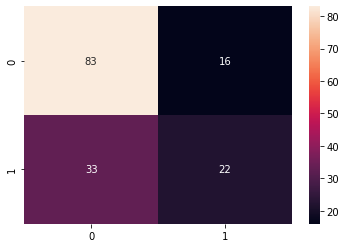

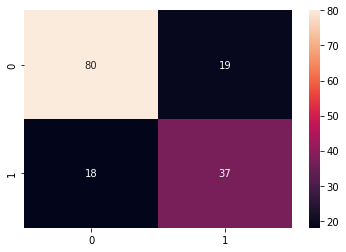

In [38]:
for i in range(len(algos)):
   
    sns.heatmap(cf_matrix[i],annot = True)
    plt.show()
    

IndexError: list index out of range

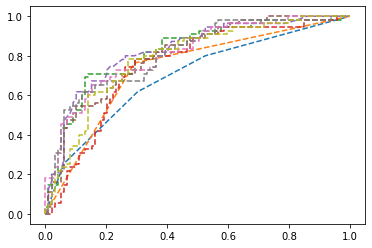

In [43]:
for i in range(len(fpers)):
    plt.plot(fpers[i], tpers[i], linestyle='--', label=algos[i])
   

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

NameError: name 'recall' is not defined